In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

# データのパスを取得
data_path0 = "/Users/asapcats099/Downloads/elo-merchant-category-recommendation/data/input/train.csv"
data_path1 = "/Users/asapcats099/Downloads/elo-merchant-category-recommendation/data/input/test.csv"
data_path2 = "/Users/asapcats099/Downloads/elo-merchant-category-recommendation/data/input/historical_transactions.csv"
data_path3 = "/Users/asapcats099/Downloads/elo-merchant-category-recommendation/data/input/new_merchant_transactions.csv"
data_path4 = "/Users/asapcats099/Downloads/elo-merchant-category-recommendation/data/input/merchants.csv"


# データの読み込み
train = pd.read_csv(data_path0)
test = pd.read_csv(data_path1)
history = pd.read_csv(data_path2)
new_merchant = pd.read_csv(data_path3)
merchants = pd.read_csv(data_path4)

In [2]:
file_name = [train,test,history,new_merchant,merchants]

for t in file_name:
    print(t.isnull().sum())

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64
first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64
authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
m

In [ ]:
# 基本情報の確認
print(train.info())

In [ ]:
print(test.info())

In [ ]:
print(history.info())

In [ ]:
print(new_merchant.info())

In [ ]:
print(merchants.info())

In [10]:
# 出力をファイルに保存する例
with open('features_isnull.txt', 'w') as f:
    f.write("Train Null Values:\n")
    f.write(str(train.isnull().sum()) + "\n\n")
    
    f.write("Test Null Values:\n")
    f.write(str(test.isnull().sum()) + "\n\n")
    
    f.write("History Null Values:\n")
    f.write(str(history.isnull().sum()) + "\n\n")
    
    f.write("New Merchant Null Values:\n")
    f.write(str(new_merchant.isnull().sum()) + "\n\n")
    
    f.write("Merchants Null Values:\n")
    f.write(str(merchants.isnull().sum()) + "\n")

In [ ]:
merchants.isnull().sum()

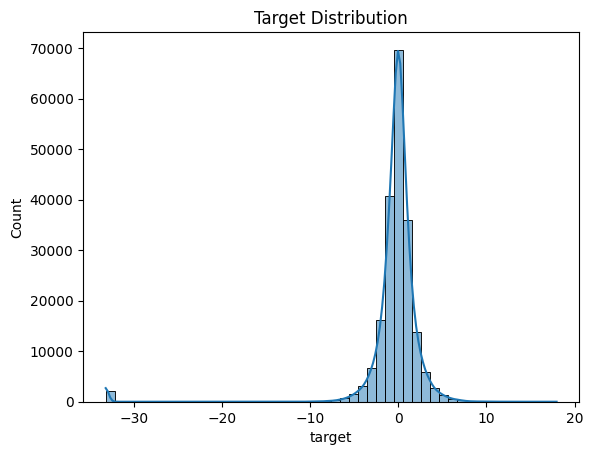

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['target'], bins=50, kde=True)
plt.title('Target Distribution')
plt.show()


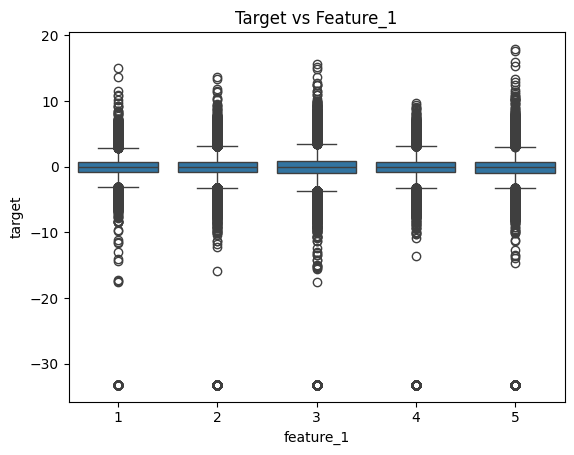

In [13]:
sns.boxplot(x='feature_1', y='target', data=train)
plt.title('Target vs Feature_1')
plt.show()

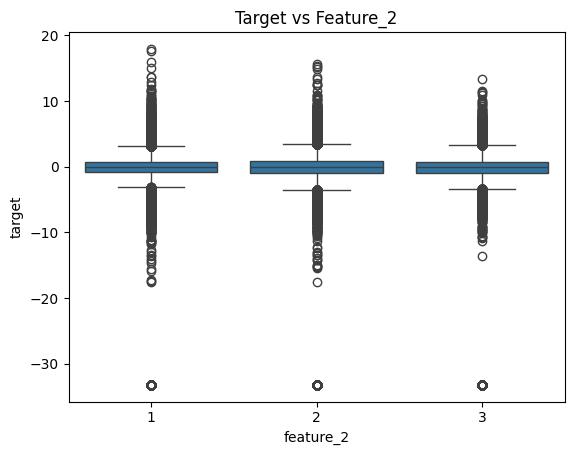

In [14]:
sns.boxplot(x='feature_2', y='target', data=train)
plt.title('Target vs Feature_2')
plt.show()

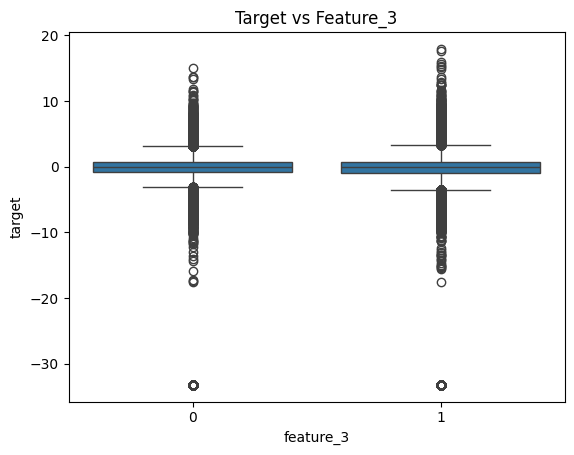

In [15]:
sns.boxplot(x='feature_3', y='target', data=train)
plt.title('Target vs Feature_3')
plt.show()

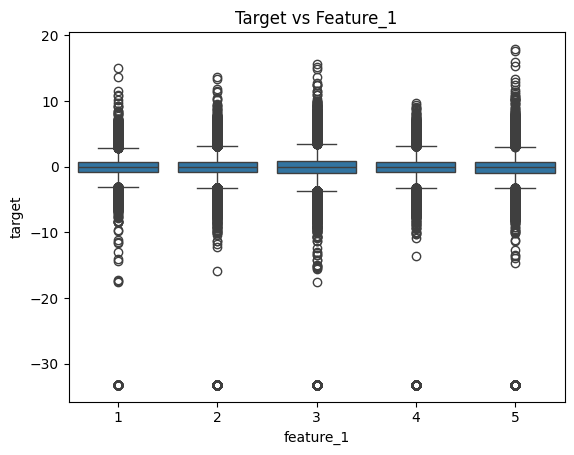

In [11]:
sns.boxplot(x='feature_1', y='target', data=train)
plt.title('Target vs Feature_1')
plt.show()


In [3]:
# カードIDごとに取引データを集約
history_agg = history.groupby('card_id').agg({
    'purchase_amount': ['sum', 'mean', 'min', 'max', 'count'],
    'month_lag': 'mean'
}).reset_index()

new_merchant_agg = new_merchant.groupby('card_id').agg({
    'purchase_amount': ['sum', 'mean', 'min', 'max', 'count'],
    'month_lag': 'mean'
}).reset_index()


In [4]:
# データフレームのカラムを確認
print("trainのカラム構造:", train.columns)
print("history_aggのカラム構造:", history_agg.columns)

trainのカラム構造: Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')
history_aggのカラム構造: MultiIndex([(        'card_id',      ''),
            ('purchase_amount',   'sum'),
            ('purchase_amount',  'mean'),
            ('purchase_amount',   'min'),
            ('purchase_amount',   'max'),
            ('purchase_amount', 'count'),
            (      'month_lag',  'mean')],
           )


In [5]:
# history_aggのカラムをフラット化
history_agg.columns = ['_'.join(filter(None, col)).strip() for col in history_agg.columns]

# 結果を確認
print(history_agg.columns)


Index(['card_id', 'purchase_amount_sum', 'purchase_amount_mean',
       'purchase_amount_min', 'purchase_amount_max', 'purchase_amount_count',
       'month_lag_mean'],
      dtype='object')


In [6]:
# new_merchant_aggのカラムをフラット化
new_merchant_agg.columns = ['_'.join(filter(None, col)).strip() for col in new_merchant_agg.columns]

# 結果を確認
print(new_merchant_agg.columns)

Index(['card_id', 'purchase_amount_sum', 'purchase_amount_mean',
       'purchase_amount_min', 'purchase_amount_max', 'purchase_amount_count',
       'month_lag_mean'],
      dtype='object')


In [7]:
# データの結合
train_merged = pd.merge(train, history_agg, on='card_id', how='left')
train_merged = pd.merge(train_merged, new_merchant_agg, on='card_id', how='left', suffixes=('_history', '_new'))


In [7]:
# 店舗情報の結合
#なぜか実行するとクラッシュする
#history_merged = pd.merge(history, merchants, on='merchant_id', how='left')

: 

In [8]:
# 店舗情報の結合
#new_merchant_merged = pd.merge(new_merchant, merchants, on='merchant_id', how='left')

In [11]:
# 例: 'first_active_month'を日付型に変換し、各成分を抽出
train_merged['first_active_month'] = pd.to_datetime(train_merged['first_active_month'])
train_merged['year'] = train_merged['first_active_month'].dt.year
train_merged['month'] = train_merged['first_active_month'].dt.month
train_merged['day'] = train_merged['first_active_month'].dt.day
train_merged['dayofweek'] = train_merged['first_active_month'].dt.dayofweek


In [14]:
print(train_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   first_active_month             201917 non-null  datetime64[ns]
 1   card_id                        201917 non-null  object        
 2   feature_1                      201917 non-null  int64         
 3   feature_2                      201917 non-null  int64         
 4   feature_3                      201917 non-null  int64         
 5   target                         201917 non-null  float64       
 6   purchase_amount_sum_history    201917 non-null  float64       
 7   purchase_amount_mean_history   201917 non-null  float64       
 8   purchase_amount_min_history    201917 non-null  float64       
 9   purchase_amount_max_history    201917 non-null  float64       
 10  purchase_amount_count_history  201917 non-null  int64         
 11  

In [17]:
import pandas as pd
from io import StringIO

# train_mergedの情報を文字列として取得
buffer = StringIO()
train_merged.info(buf=buffer)

# StringIOから文字列を取得
info_str = buffer.getvalue()

# 情報をファイルに書き出す
with open('train_merged_info.txt', 'w') as f:
    f.write(info_str)


In [22]:
new_train_merged = train_merged.drop('card_id', axis=1)

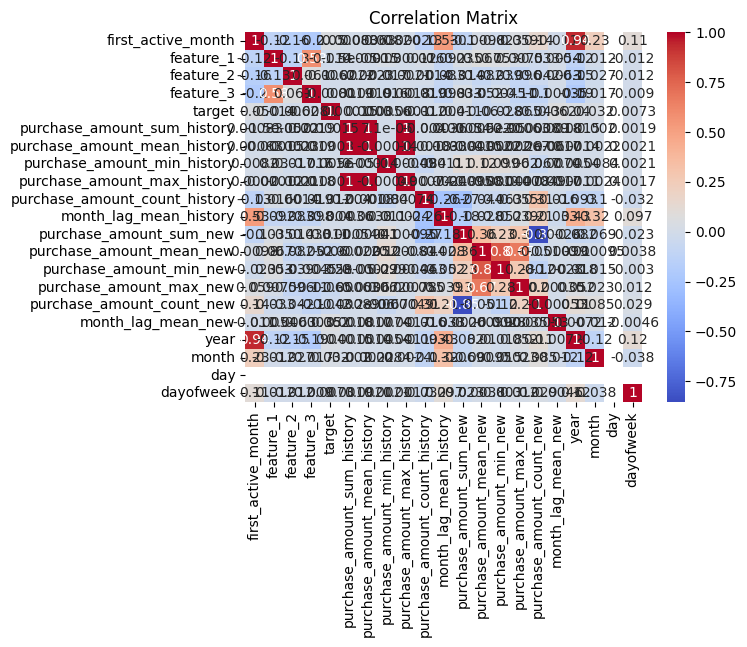

In [23]:
# 特徴量を追加した後の相関行列の生成
corr_matrix = new_train_merged.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

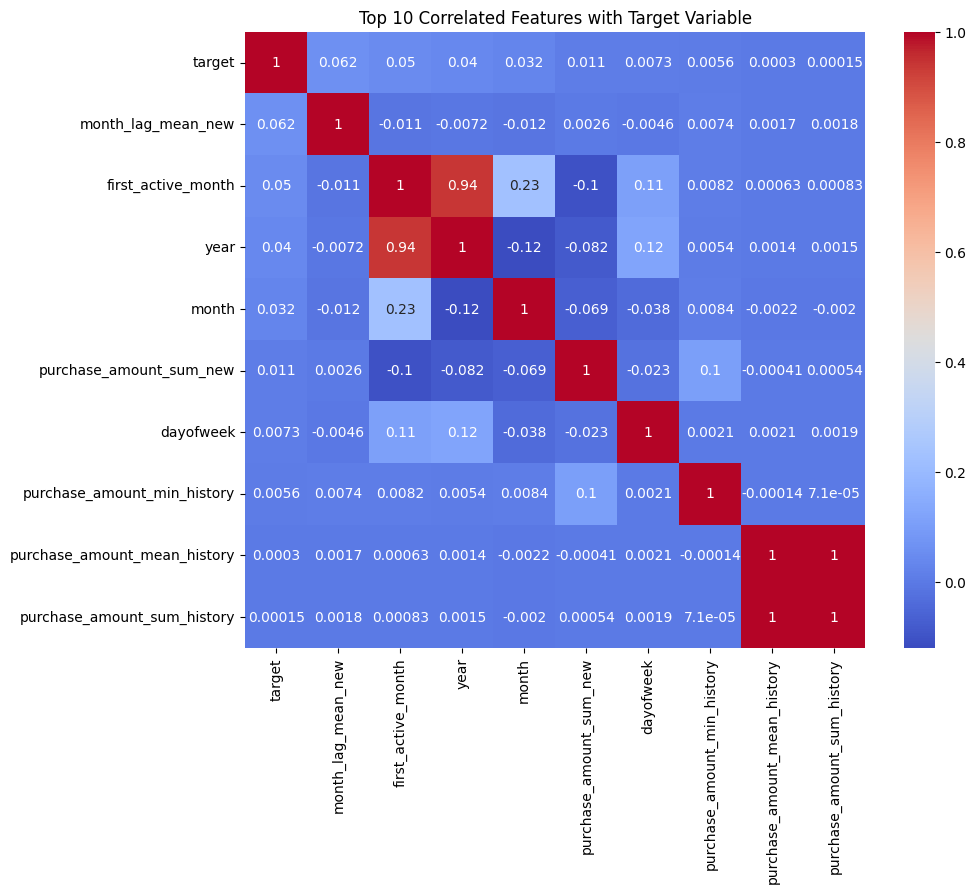

In [25]:
# 相関行列を取得
corr_matrix = new_train_merged.corr()

# 上位10個の変数を選択
top_corr_features = corr_matrix.nlargest(10, 'target')['target'].index  # 'target_variable' は目的の変数に置き換えてください
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], annot=True, cmap='coolwarm')
plt.title('Top 10 Correlated Features with Target Variable')
plt.show()


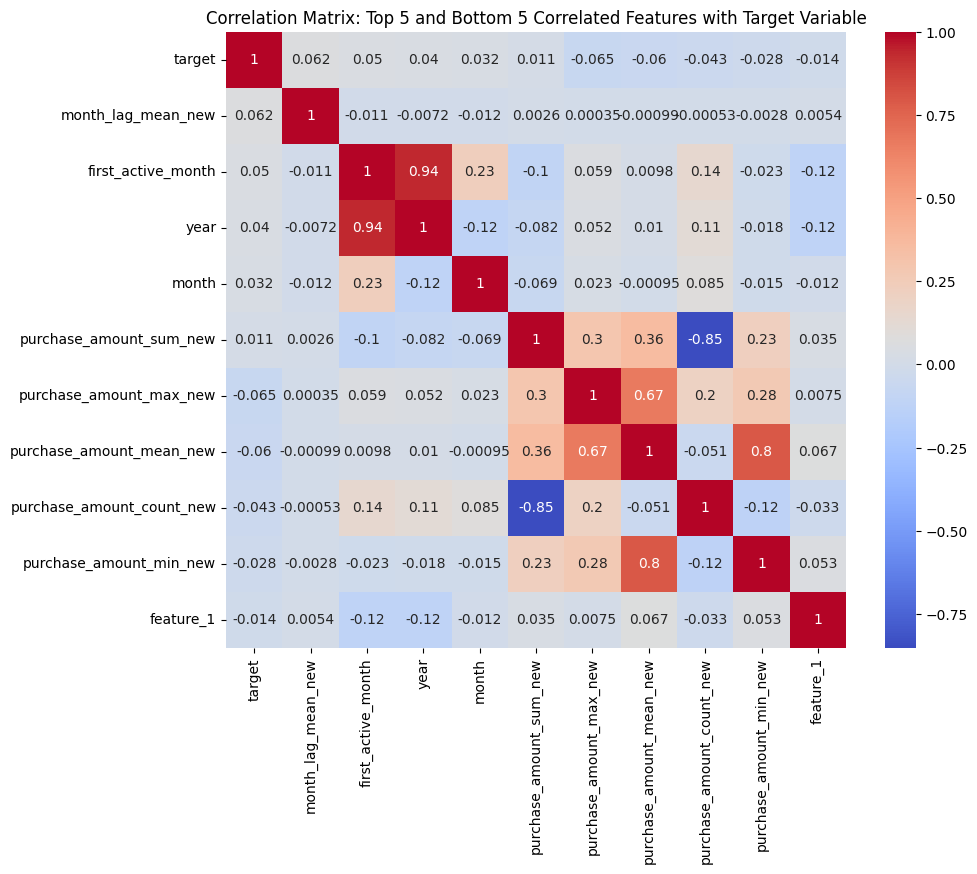

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 特徴量を追加した後の相関行列の生成
corr_matrix = new_train_merged.corr()

# 相関が高い上位5つの変数を選択（target_variableとの相関に基づく）
top_corr_features = corr_matrix['target'].nlargest(6).index  # 'target_variable' を目的の変数に置き換えてください
# 相関が低い下位5つの変数を選択（target_variableとの相関に基づく）
bottom_corr_features = corr_matrix['target'].nsmallest(5).index  # 下位5つを選択

# 上位と下位の変数を結合
selected_features = top_corr_features.append(bottom_corr_features)

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[selected_features, selected_features], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Top 5 and Bottom 5 Correlated Features with Target Variable')
plt.show()


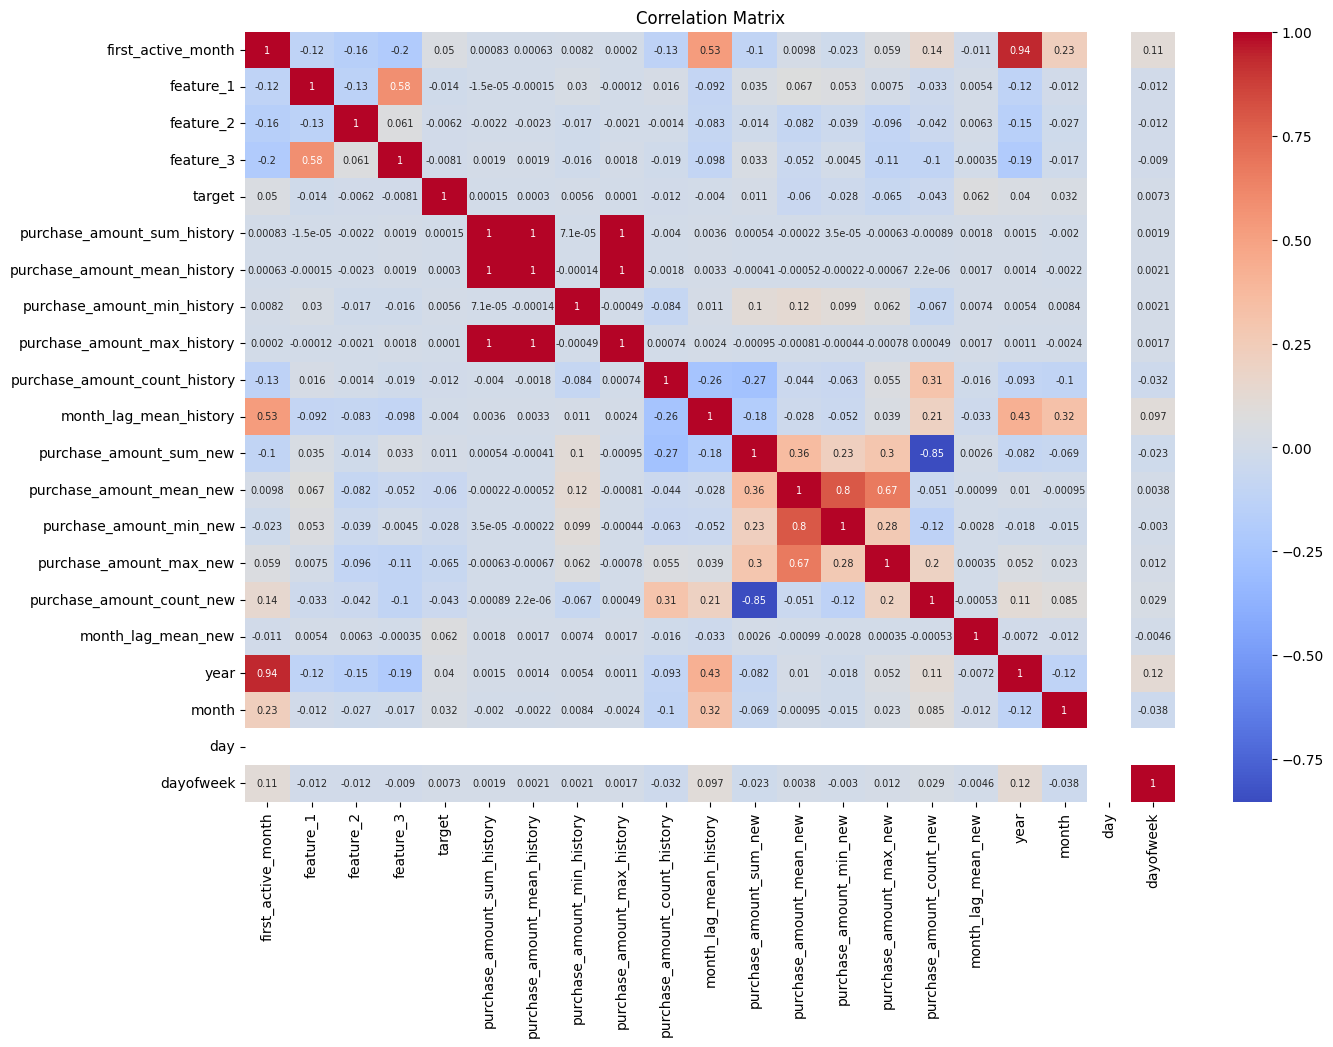

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 7})  # フォントサイズを8に設定
plt.title('Correlation Matrix')
plt.show()
